In [1]:
#Importing libraries
import re
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create variables that contains the user credentials to access the twitter API
Consumer_Key = "z1kLR6SE40e4cN4hwz0RM061C"
Consumer_Secret = "gCPu5q8z18GawK9NbrhWGrIzFJP9lG6h6CQ6cPZIVhbdHS6CRP"
Access_Key = "1339139367185514498-hIiJPHQiLvTyoOROI4EkbSji2NjtCP"
Access_Secret = "yTY1usvtYnlk2qfOaS9v0nl9mjdQ4UdcoCa9WjP6ZMUx0"

In [3]:
#Creating a function for getting tweets from twitter
def fetch_data(search_term):
    #Authorization to consumer key and consumer secret
    auth = tweepy.AppAuthHandler(Consumer_Key, Consumer_Secret)
    
    #Calling an API
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    #3000 tweets to be extracted
    no_of_tweets = 3000
    temp = []
    tweets = tweepy.Cursor(api.search, q=search_term, lang='en').items(no_of_tweets)
    for tweet in tweets:
        temp.append(tweet.text)
    return temp

In [4]:
#Fetching tweets
l1 = fetch_data('Amazon')
l2 = fetch_data('Flipkart')
l3 = fetch_data('Snapdeal')

In [5]:
#Convert list of tweets into dataframe
amazon_tweets = pd.DataFrame(l1, columns=['tweet'])
flipkart_tweets = pd.DataFrame(l2, columns=['tweet'])
snapdeal_tweets = pd.DataFrame(l3, columns=['tweet'])

In [6]:
#Export dataframe into csv file
amazon_tweets.to_csv('amazon_tweets', index=False)
flipkart_tweets.to_csv('flipkart_tweets', index=False)
snapdeal_tweets.to_csv('snapdeal_tweets', index=False)

In [7]:
amazon_tweets.head(10)

,tweet
0,"@mymalishka Hi guys, I would recommend a great..."
1,@CentoraniRob @amazon @Nike @Walmart @Google F...
2,For all the hindi novel and poetry lovers \n\n...
3,Amazon is Evil Incarnate. Simple. https://t.co...
4,RT @CerealMidnight: Your Highness Arrives from...
5,Buy Now from Amazon &gt; https://t.co/Q2CaJbN7...
6,FREE for a limited time.\nThanks for your cour...
7,Just saw this on Amazon: Hermah Letter Charm A...
8,RT @SwarfegaUK: **3 DAYS TO GO**\n\nTime to pa...
9,"RT @__JayyKing: Dear UPS, USPS, FedEx, &amp; A..."


In [8]:
flipkart_tweets.head(10)

,tweet
0,@flipkartsupport Any update #Flipkart it's bee...
1,@flipkartsupport\n@Jairam_Ramesh #FCService #F...
2,@flipkartsupport\n@Jairam_Ramesh #FCService #F...
3,@flipkartsupport\n@Jairam_Ramesh #FCService #F...
4,@Lakersa00207585 Pandemic makes no sense as an...
5,@flipkartsupport flipkart fraud \norder id..OD...
6,@Flipkart I have ordered toys for Christmas fo...
7,@AxisBank @mastercardindia @ari_sarker @Master...
8,@flipkartsupport @Walmart @walmartindia @Flipk...
9,RT @proton05860685: #UnfoldSSRMurderCase \n\nA...


In [9]:
snapdeal_tweets.head(10)

,tweet
0,@iDharaMehta @SadiiyaMemon @myntra @snapdeal @...
1,@SadiiyaMemon @myntra @snapdeal @amazon @Walma...
2,@eyefarhan @SadiiyaMemon @myntra @snapdeal @am...
3,A treat for your feet! 😊\n👉 https://t.co/PLsEh...
4,@SadiiyaMemon @myntra @snapdeal @amazon @Walma...
5,@eyefarhan @myntra @snapdeal @amazon @Walmart ...
6,RT @wief2021: Excited and proud to announce ou...
7,@amazonIN cancelled my Christmass won't which ...
8,RT @wief2021: Excited and proud to announce ou...
9,@KhushalBadgujar Thanks for sharing your feedb...


## Data Cleaning and Removing Stopwords

In [10]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
#Clean data and removing stopwords
def clean_data(input_text):
    input_text = input_text.lower()
    tokens = input_text.split()
    clean_tokens = [re.sub("[^a-z]", "", token) for token in tokens]
    clean_tokens = [word for word in clean_tokens if 'rt' not in word]
    clean_tokens = [word for word in clean_tokens if len(word) >=3]
    clean_tokens = [word for word in clean_tokens if word not in stopwords_list]  #Removing stopwords
    return ' '.join(clean_tokens)

In [11]:
amazon_tweets['tweet'] = amazon_tweets['tweet'].apply(clean_data)
flipkart_tweets['tweet'] = flipkart_tweets['tweet'].apply(clean_data)
snapdeal_tweets['tweet'] = snapdeal_tweets['tweet'].apply(clean_data)

In [12]:
amazon_tweets.head(10)

,tweet
0,mymalishka guys would recommend great solar li...
1,centoranirob amazon nike google run pizza plac...
2,hindi novel poetry lovers amazon kindle httpst...
3,amazon evil incarnate simple httpstcovbqzqbky
4,cerealmidnight highness arrives millcreekent j...
5,buy amazon httpstcoqcajbnbx httpstcoccfwqpnab
6,free limited time thanks like profit selling h...
7,saw amazon hermah letter charm anklet fashion ...
8,swarfegauk days time panic youve nailed christ...
9,jayyking dear ups usps fedex amp amazon employ...


In [13]:
flipkart_tweets.head(10)

,tweet
0,update days guys still updated technician visit
1,jairamramesh fcservice retweet network effect ...
2,jairamramesh fcservice retweet network effect ...
3,jairamramesh fcservice retweet network effect ...
4,lakersa pandemic makes sense excuse try callin...
5,fraud order idod complain many times also http...
6,ordered toys christmas kids delivery date show...
7,axisbank mastercardindia arisarker mastercarda...
8,iyerkrish httpstcojhxpsoeau
9,proton unfoldssrmurdercase accordin room mates...


In [14]:
snapdeal_tweets.head(10)

,tweet
0,idharamehta sadiiyamemon myntra snapdeal amazo...
1,sadiiyamemon myntra snapdeal amazon rakuten gr...
2,eyefarhan sadiiyamemon myntra snapdeal amazon ...
3,treat feet httpstcoplsehoweec shopfromyourhome...
4,sadiiyamemon myntra snapdeal amazon rakuten gr...
5,eyefarhan myntra snapdeal amazon rakuten gregd...
6,wief excited proud announce lineup speakers pa...
7,amazonin cancelled christmass wont arrive orde...
8,wief excited proud announce lineup speakers pa...
9,khushalbadgujar thanks sharing feedback well d...


### Sentiment Analysis

In [15]:
#Create a function to get a sentiment of tweets
from textblob import TextBlob
def get_sentiment(input):
    blob = TextBlob(input)
    sentiment = blob.sentiment.polarity
    return sentiment

In [16]:
#Create a new column 'sentiment'
amazon_tweets['sentiment'] = amazon_tweets['tweet'].apply(get_sentiment)
flipkart_tweets['sentiment'] = flipkart_tweets['tweet'].apply(get_sentiment)
snapdeal_tweets['sentiment'] = snapdeal_tweets['tweet'].apply(get_sentiment)

In [17]:
amazon_tweets.head(10)

,tweet,sentiment
0,mymalishka guys would recommend great solar li...,0.80000
1,centoranirob amazon nike google run pizza plac...,0.00000
2,hindi novel poetry lovers amazon kindle httpst...,0.00000
3,amazon evil incarnate simple httpstcovbqzqbky,-0.50000
4,cerealmidnight highness arrives millcreekent j...,0.00000
5,buy amazon httpstcoqcajbnbx httpstcoccfwqpnab,0.00000
6,free limited time thanks like profit selling h...,0.17619
7,saw amazon hermah letter charm anklet fashion ...,0.00000
8,swarfegauk days time panic youve nailed christ...,0.00000
9,jayyking dear ups usps fedex amp amazon employ...,0.00000


In [18]:
flipkart_tweets.head(10)

,tweet,sentiment
0,update days guys still updated technician visit,0.00
1,jairamramesh fcservice retweet network effect ...,0.00
2,jairamramesh fcservice retweet network effect ...,0.00
3,jairamramesh fcservice retweet network effect ...,0.00
4,lakersa pandemic makes sense excuse try callin...,-0.05
5,fraud order idod complain many times also http...,0.50
6,ordered toys christmas kids delivery date show...,0.00
7,axisbank mastercardindia arisarker mastercarda...,0.00
8,iyerkrish httpstcojhxpsoeau,0.00
9,proton unfoldssrmurdercase accordin room mates...,0.00


In [19]:
snapdeal_tweets.head(10)

,tweet,sentiment
0,idharamehta sadiiyamemon myntra snapdeal amazo...,0.000000
1,sadiiyamemon myntra snapdeal amazon rakuten gr...,0.000000
2,eyefarhan sadiiyamemon myntra snapdeal amazon ...,0.000000
3,treat feet httpstcoplsehoweec shopfromyourhome...,0.000000
4,sadiiyamemon myntra snapdeal amazon rakuten gr...,0.000000
5,eyefarhan myntra snapdeal amazon rakuten gregd...,0.000000
6,wief excited proud announce lineup speakers pa...,0.587500
7,amazonin cancelled christmass wont arrive orde...,0.000000
8,wief excited proud announce lineup speakers pa...,0.587500
9,khushalbadgujar thanks sharing feedback well d...,0.133333


In [20]:
#Separating positive and negative tweets
amazon_negative_tweets = amazon_tweets[amazon_tweets['sentiment'] < 0].count()[0]
amazon_positive_tweets = amazon_tweets[amazon_tweets['sentiment'] > 0].count()[0]

flipkart_negative_tweets = flipkart_tweets[flipkart_tweets['sentiment'] < 0].count()[0]
flipkart_positive_tweets = flipkart_tweets[flipkart_tweets['sentiment'] > 0].count()[0]

snapdeal_negative_tweets = snapdeal_tweets[snapdeal_tweets['sentiment'] < 0].count()[0]
snapdeal_positive_tweets = snapdeal_tweets[snapdeal_tweets['sentiment'] > 0].count()[0]

In [21]:
y_pos = [0, 1]
amazon_counts = [amazon_negative_tweets, amazon_positive_tweets]
flipkart_counts = [flipkart_negative_tweets, flipkart_positive_tweets]
snapdeal_counts = [snapdeal_negative_tweets, snapdeal_positive_tweets]

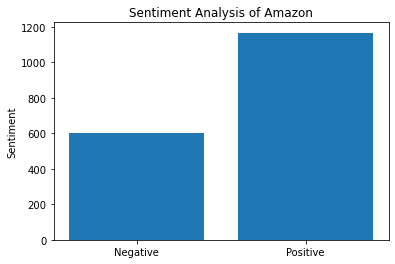

In [22]:
#Plotting a bar graph for viewing sentiment of tweets of Amazon
plt.bar(y_pos, amazon_counts, align='center', alpha=1)
plt.xticks(y_pos, ['Negative', 'Positive'])
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of Amazon')
plt.show()

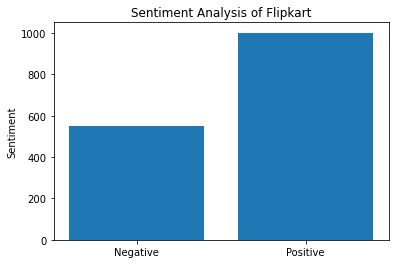

In [23]:
#Plotting a bar graph for viewing sentiment of tweets of flipkart
plt.bar(y_pos, flipkart_counts, align='center', alpha=1)
plt.xticks(y_pos, ['Negative', 'Positive'])
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of Flipkart')
plt.show()

Text(0.5, 1.0, 'Sentiment Analysis of Snapdeal')

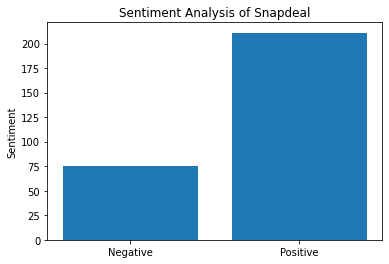

In [24]:
#Plotting a bar graph for viewing sentiment of tweets of snapdeal
plt.bar(y_pos, snapdeal_counts, align='center', alpha=1)
plt.xticks(y_pos, ['Negative', 'Positive'])
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of Snapdeal')

### Create a wordcloud

In [25]:
from wordcloud import WordCloud

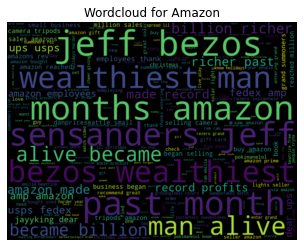

In [26]:
#Creating wordcloud for amazon
allwords = ' '.join(word for word in amazon_tweets['tweet'])
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=120).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Amazon')
plt.show()

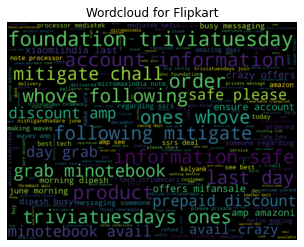

In [27]:
#Creating wordcloud for flipkart
allwords = ' '.join(word for word in flipkart_tweets['tweet'])
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=120).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Flipkart')
plt.show()

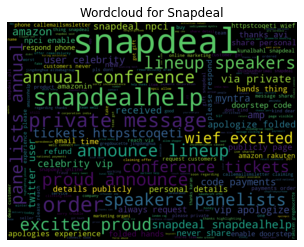

In [28]:
#Create wordcloud for snapdeal
allwords = ' '.join(word for word in snapdeal_tweets['tweet'])
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=120).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Snapdeal')
plt.show()